#1. Exploratory Data Analysis: <br>



In [1]:
pip install transformers datasets evaluate accelerate rouge_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.0 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=2651a2551a9a58c7c30ef1ba30ab1b1af93c7aa5fb9aa8bbf302b39675c3f752
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [2]:
!pip install nltk

In [3]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
import accelerate
import transformers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from datasets import load_dataset_builder
from datasets import load_dataset
import seaborn as sns

##(a) Conduct an initial exploration of the SAMSum dataset to gain insights into the characteristics of the dialogues and summaries. <br>

In [ ]:
dataset = load_dataset("samsum")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [9]:
train = load_dataset("samsum", split="train")
test = load_dataset("samsum", split="test")
val = load_dataset("samsum", split="validation")

Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

In [ ]:
train

Dataset({
    features: ['id', 'dialogue', 'summary'],
    num_rows: 14732
})

In [ ]:
test

Dataset({
    features: ['id', 'dialogue', 'summary'],
    num_rows: 819
})

In [ ]:
val

Dataset({
    features: ['id', 'dialogue', 'summary'],
    num_rows: 818
})

In [12]:
train_data = pd.DataFrame(train)

In [13]:
pd.set_option('display.max_colwidth', None)

In [14]:
sample = train_data.sample(5)

In [15]:
sample[['dialogue','summary']]

,dialogue,summary
6406,"Sharon: Is Ben with you?\r\nPeter: No, why?\r\nSharon: I can't reach him\r\nPeter: He's in a meeting\r\nSharon: Ok I'll leave him a message. Please tell him I'm waiting downstairs if you see him\r\nPeter: Ok no problem","Sharon is waiting downstairs for Ben, who is in a meeting."
13504,"Bernie: Hey, have we agreed on the place yet? And who brings what?\r\nClaudia: Good question ;) I'm gonna buy everything when I'm in Warsaw\r\nBernie: Sure, don't carry too much\r\nAgnes: Place - my appartment, 6 pm\r\nAgnes: Claudia, I'm cooking so no need to buy anything! Just show up! :)\r\nMaya: I'm gonna get some wine ;)\r\nAlice: I'm getting some red wine too!\r\nMaya: <file_gif>\r\nBernie: Should I get some dessert then?\r\nKenny: I'm helping to cook #powercouple\r\nAgnes: <3\r\nAnna: Me and hubby are getting some wine then\r\nAgnes: Thanks!","Bernie, Claudia, Maya, Alice and Anna are meeting at Kenny's and Agnes place for a dinner at 6 pm. Agnes is cooking. Maya, Alice and Anna will get some wine."
11927,"Martin Kelly: Hi, attached is the handout for tomorrow.\nMartin Kelly: <file_other>\nPatrick Smith: Thank you professor\nMartin Kelly: If you have time, you could look through the English review and make a note of new phrases.\nPatrick Smith: Yes, of course, I'll read it today.\nMartin Kelly: It's very well written\nMartin Kelly: See you tomorrow!\nPatrick Smith: Ok, thank you very much!",Martin Kelly sends Patrick Smith a handout for tomorrow. Patrick Smith will read the English review.
4844,"Sophie: Omg Ariana Grande and Pete Davidson broke up!!\r\nClark: Why are you telling me this?\r\nSophie: Because! it's interesting! and like so funny cause they were so into each other. \r\nClark: Mhm. Pete, that's the guy from Saturday Night Live right?\r\nSophie: I think so? The more important person here is Arianna, clearly. \r\nClark: I really like SNL, it's so funny!\r\nSophie: I feel like you're ignoring what I'm saying. \r\nClark: Oh, you noticed?",Sophie is shocked at the fact that Ariana Grande and Pete Davidson broke up.
11582,"Olga: How did the concert go?\r\nAdam: It was incredible :D\r\nAsia: It really was, once in a lifetime experience\r\nOlga: Too bad I missed it :/\r\nAdam: You said yourself that you aren't too much of a fan of his music :p\r\nOlga: Well true, but everyone is saying that it was great :)\r\nAsia: I am sure being back home is also cool\r\nOlga: True, I haven't been for quite some time. Did he play his newer songs or?\r\nAsia: I was afraid of that, but he mostly played older songs\r\nAdam: 3 new ones, 3-4 from The Wings and the rest was oldies ;)\r\nAsia: It started out quite slowly, he even seemed sad at the start, but the second part was amazing\r\nAdam: And everyone was sitting, we were the youngest in our row haha\r\nOlga: Haha, well he isn't the youngest himself :D\r\nAsia: 75, same age as my grandpa\r\nAdam: And I can't imagine your grandpa jumping around like that ;)\r\nAsia: I can barely imagine him getting up from his sofa haha\r\nAdam: I also loved that joke with Saiko, it was so British :D\r\nAsia: The guy followed him all they way from Japan, he deserved some recognition :p\r\nAdam: You are saiko man hahaha\r\nOlga: What does it mean?\r\nAsia: Saiko according to him means awesome in Japanese, so he called the guy saiko :D",Adam and Asia went to a concert. Olga didn't go as she is back home. Olga is not a big fan of his music but regrets not going to the concert. He played mostly his old songs and several new ones. He is 75. A man came to the concert from Japan. He made a joke about it.


##(b) Plot the length distribution of dialogues and summaries in the training set.

In [ ]:
train_data['dialogue_length'] = train_data['dialogue'].apply(len)
train_data['summary_length'] = train_data['summary'].apply(len)

In [ ]:
sample['dialogue_length'] = train_data['dialogue'].apply(len)
sample['summary_length'] = train_data['summary'].apply(len)

Text(0.5, 1.0, 'Length distribution of dialogues')

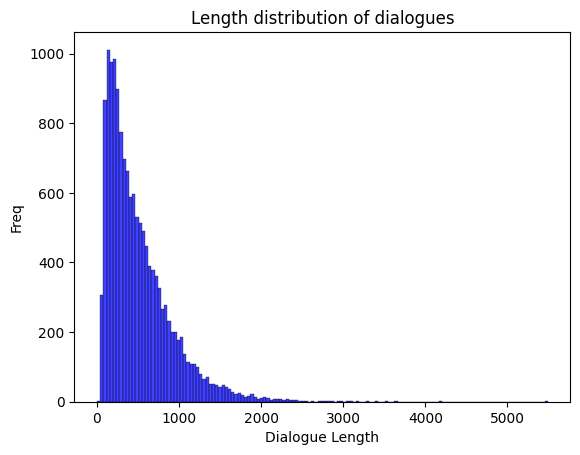

In [ ]:
# Create a histogram plot using Seaborn
sns.histplot(data=train_data, x='dialogue_length', color='blue')

# Set labels and title
plt.xlabel('Dialogue Length')
plt.ylabel('Freq')
plt.title('Length distribution of dialogues')

Text(0.5, 1.0, 'Length distribution of summaries')

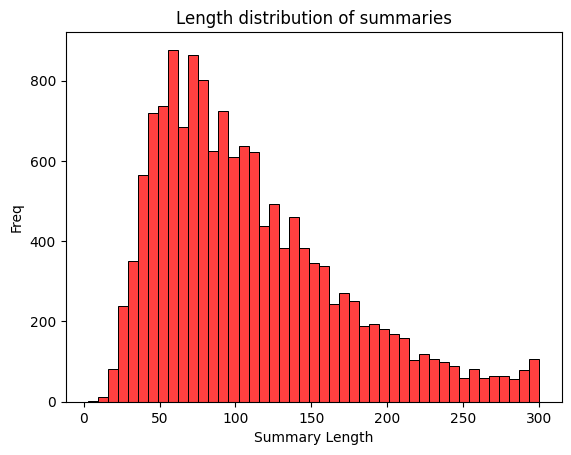

In [ ]:
# Create a histogram plot using Seaborn
sns.histplot(data=train_data, x='summary_length', color='red')

# Set labels and title
plt.xlabel('Summary Length')
plt.ylabel('Freq')
plt.title('Length distribution of summaries')

In [ ]:
print(train_data['dialogue_length'].describe())

count    14732.000000
mean       511.183614
std        402.621436
min          0.000000
25%        216.000000
50%        401.000000
75%        694.000000
max       5492.000000
Name: dialogue_length, dtype: float64


In [ ]:
print(train_data['summary_length'].describe())

count    14732.000000
mean       110.134673
std         60.892471
min          3.000000
25%         63.000000
50%         96.000000
75%        144.000000
max        300.000000
Name: summary_length, dtype: float64


In [ ]:
# Data cleaning: These rows will be removed before training model

In [ ]:
train_data[train_data['dialogue_length'] == 0]

,id,dialogue,summary,dialogue_length,summary_length
6054,13828807,,problem with visualization of the content,0,41


In [ ]:
train_data[train_data['summary_length'] < 10]

,id,dialogue,summary,dialogue_length,summary_length
1760,13810635,Rivka: How do you like your neighborhood\r\nCoen: I dont like them much\r\nRivka: Why is that so?\r\nCoen: They are so mean like they play songs at loud music even late night\r\nRivka: Maybe you can request them to slow down the volume\r\nCoen: We have tried to do so\r\nRivka: Why dont you ask your mother to visit their place?\r\nCoen: I will,test,330,4
4889,13727708,"Sue: WOW! you look awesome in this picture\r\nJoanna: The dress covered it up\r\nSue: Are you coming back?\r\nJoanna: Yeah, I'm in a hurry\r\nJoanna: Speak to you later!",yyy,161,3


#2. Inference with Pre-trained Models: <br>
##(a) Choose at least three pre-trained summarization models from the Hugging Face model hub, such as facebook/bart-large-cnn or t5-large. <br>
##(b) Use the models to generate summaries for a few randomly selected dialogues. Analyze the quality of these summaries: Are they coherent? Do they capture the essential points in the conversation?

###Models selected: facebook/bart-large-cnn, google-t5/t5-small, google pegasus-cnn_dailymail

In [5]:
bart_large_cnn_summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
pegasus_cnn_dailymail_summarizer = pipeline("summarization", model="google/pegasus-cnn_dailymail")
google_t5_small_summarizer = pipeline("summarization",model="google-t5/t5-small")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [6]:
summaries = pd.DataFrame(columns=['original summary','bart_large_cnn_summary','pegasus_cnn_dailymail_summary','google_t5_small_summary'])

In [16]:
for row in range(sample.shape[0]):
  dialogue = sample.iloc[row,1]
  original_summary = sample.iloc[row,2]

  bart_large_cnn_summary = bart_large_cnn_summarizer(dialogue, max_length=60, min_length=10, do_sample=False)
  pegasus_cnn_dailymail_summary = pegasus_cnn_dailymail_summarizer(dialogue, max_length=60, min_length=10, do_sample=False)
  google_t5_small_summary = google_t5_small_summarizer(dialogue, max_length=60, min_length=10, do_sample=False)

  row = {'original summary':original_summary,'bart_large_cnn_summary':bart_large_cnn_summary,
         'pegasus_cnn_dailymail_summary':pegasus_cnn_dailymail_summary,'google_t5_small_summary':google_t5_small_summary}
  summaries = summaries.append(row, ignore_index=True)



Your max_length is set to 60, but your input_length is only 59. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)
<ipython-input-16-5f9f89404153>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summaries = summaries.append(row, ignore_index=True)
<ipython-input-16-5f9f89404153>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summaries = summaries.append(row, ignore_index=True)
<ipython-input-16-5f9f89404153>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summaries = summaries.append(row, ignore_index=True)
<ipython-input-16-5f9f89404153>:11: FutureWarning: The frame.append method is de

In [23]:
summaries

,original summary,bart_large_cnn_summary,pegasus_cnn_dailymail_summary,google_t5_small_summary
0,"Sharon is waiting downstairs for Ben, who is in a meeting.","[{'summary_text': 'Sharon: Is Ben with you? Peter: No, why? Sharon: I can't reach him, he's in a meeting. Peter: Ok I'll leave him a message. Please tell him I'm waiting downstairs if you see him.'}]","[{'summary_text': 'Sharon: Is Ben with you? Peter: No, why?<n>Sharon: I can't reach him Peter: He's in a meeting Sharon: Ok I'll leave him a message.'}]",[{'summary_text': 'Sharon: I can't reach him Peter: he's in a meeting Sharon: Ok I'll leave him a message . I'm waiting downstairs if you see him Peter .'}]
1,"Bernie, Claudia, Maya, Alice and Anna are meeting at Kenny's and Agnes place for a dinner at 6 pm. Agnes is cooking. Maya, Alice and Anna will get some wine.","[{'summary_text': 'Bernie and Agnes are going to a party in Warsaw. Agnes is cooking, so there's no need to buy anything. Bernie wants to bring dessert.'}]","[{'summary_text': 'Claudia: Good question ;) I'm gonna buy everything when I'm in Warsaw Bernie: Sure, don't carry too much Agnes: Place - my appartment, 6 pm Agnes: Claudia, I'm cooking so no need to buy anything! Just show up! :) Maya:'}]","[{'summary_text': 'Agnes: Place - my appartment, 6 pm Agnes . she says she's cooking so no need to buy anything .'}]"
2,Martin Kelly sends Patrick Smith a handout for tomorrow. Patrick Smith will read the English review.,"[{'summary_text': 'Patrick Smith: Thank you professor. Martin Kelly: Hi, attached is the handout for tomorrow. Patrick Smith: Yes, of course, I'll read it today.'}]","[{'summary_text': 'Patrick Smith: I'll look through the English review and make a note of new phrases.<n>Martin Kelly: It's very well written. See you tomorrow!<n>Patrick Smith: Ok, thank you very much!'}]",[{'summary_text': 'the handout for tomorrow is attached . Martin Kelly: I'll read it today!'}]
3,Sophie is shocked at the fact that Ariana Grande and Pete Davidson broke up.,[{'summary_text': 'Sophie: Omg Ariana Grande and Pete Davidson broke up!! Pete Davidson is the guy from Saturday Night Live right?'}],[{'summary_text': 'Ariana Grande and Pete Davidson have broken up .<n>The couple have been dating since September .<n>Pete Davidson is a star of Saturday Night Live .'}],"[{'summary_text': 'Sophie: 'i really like SNL, it's so funny!' Sophie: ""you noticed?'}]"
4,Adam and Asia went to a concert. Olga didn't go as she is back home. Olga is not a big fan of his music but regrets not going to the concert. He played mostly his old songs and several new ones. He is 75. A man came to the concert from Japan. He made a joke about it.,"[{'summary_text': 'Olga and Adam went to the concert. The concert was a once in a lifetime experience. Olga is a fan of his music, but not of his songs.'}]","[{'summary_text': 'Adam: It really was, once in a lifetime experience .<n>Olga: Well true, but everyone is saying that it was great :) Asia: I am sure being back home is also cool .'}]","[{'summary_text': 'saiko man hahahaha Olga says he isn't too much of a fan of his music . he says it was incredible :D Asia: ""too bad I missed it""'}]"


## **Summary wise analysis** <br>
For all summaries I am giving tags like coverage and coherent to indicate if that model's summary covered all the essential points in the conversation and if the summary was logical and consistent. I also give IMO (in my opinion) to indicate the model I liked. <br>
### **Summary 1:** <br>
Bart-> well-covered <br>
Pegasus-> mostly-covered <br>
T5-> mostly-covered <br>
IMO-> Bart did the best job as it summarized the content correctly. <br>

### **Summary 2:** <br>
All models weren't able to cover all the points. They covered few essential points. <br>
IMO-> T5 covered most points and produced shortest summary <br>

### **Summary 3: <br>**
Bart-> mostly-covered <br>
Pegasus-> mostly-covered <br>
T5-> poorly-covered <br>
IMO-> Bart did the best job as it summarized the content correctly. <br>

### **Summary 4:** <br>
Bart-> Well-covered<br>
Pegasus-> mostly-covered<br>
T5-> poorly-covered<br>
IMO-> Bart did the best job of summarization in this eg.

### **Summary 5:** <br>
Bart-> poorly-covered <br>
Pegasus-> mostly-covered <br>
T5-> Not Coherent and misunderstood <br>
IMO-> Pegasus did the best job of summarization in this eg. <br>

Final opinion: Bart produces coherent summaries (it produces actual summary rather than summary of dialogs). Pegasus summaries are usually shorter that that of bart and captures most of points of conversations. T5 summaries were not good.

#Q3 (Done in another notebook [Q3_LLM_HW3_Model_Finetuning_T5.ipynb])

#Q4 (Done in another notebook [Q4_LLM_HW3_Model_Evaluation.ipynb])

#Q5 Write a detailed report covering the model choice, dataset preparation, fine-tuning process, and an analysis of the summarization performance before and after fine-tuning. [HW3-LLM-Report.pdf]

#Q6 Submit your code, ensuring it is well-commented and organized, with clear instructions for running the inference and fine-tuning processes.